## Gradient Descent Code-Along

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

In [2]:
# The objective function
def f(x): return x**2
x = np.linspace(-2, 2, 100)

In [3]:
# Derivative of the objective function
def df(x): return 2*x

In [14]:
#np.gradient(f(x)) #numeric approximation for the derivative

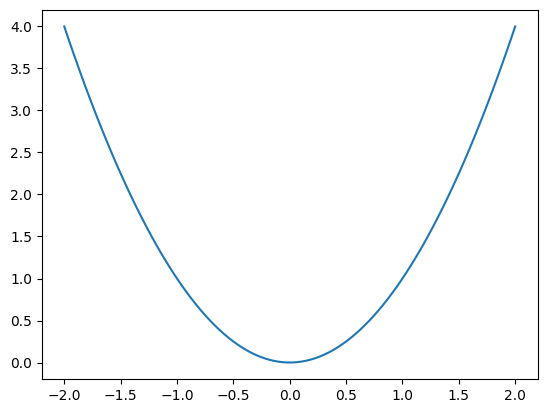

In [4]:
# Let's see what it looks like
plt.plot(x, f(x))

In [5]:
x0 = 1

$$x_{next} = x_{prev} - \alpha f'(x_{prev})$$

In [6]:
x0 - .1*df(x0)

0.8

In [7]:
xs = [x0]
for i in range(25):
    xnext = xs[-1] - 0.1*df(xs[-1])
    xs.append(xnext)

In [8]:
xs

[1,
 0.8,
 0.64,
 0.512,
 0.4096,
 0.32768,
 0.26214400000000004,
 0.20971520000000005,
 0.16777216000000003,
 0.13421772800000004,
 0.10737418240000003,
 0.08589934592000002,
 0.06871947673600001,
 0.05497558138880001,
 0.04398046511104001,
 0.035184372088832,
 0.028147497671065603,
 0.02251799813685248,
 0.018014398509481985,
 0.014411518807585589,
 0.01152921504606847,
 0.009223372036854777,
 0.007378697629483821,
 0.005902958103587057,
 0.004722366482869646,
 0.0037778931862957168]

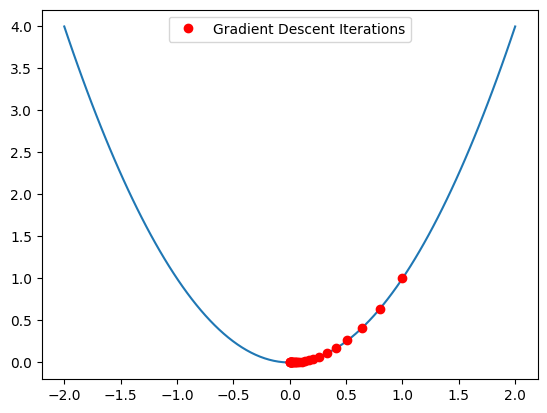

In [9]:
plt.plot(x, f(x))
plt.plot(xs, f(np.array(xs)), 'ro', label = 'Gradient Descent Iterations');
plt.legend();

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.linear_model import Ridge

In [12]:
%%latex
$\alpha$

<IPython.core.display.Latex object>

In [13]:
α = .1

#### `scipy.optimize`

Imagine what kinds of problems you can solve!!

In [14]:
from scipy.optimize import minimize

In [15]:
minimize(f, x0 = 1)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.5507930986288555e-17
        x: [-7.450e-09]
      nit: 2
      jac: [ 4.322e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

## Let's see if we can do OLS by Gradient Descent!

In [16]:
#tips data
import seaborn as sns
tips = sns.load_dataset('tips')

<Axes: xlabel='total_bill', ylabel='tip'>

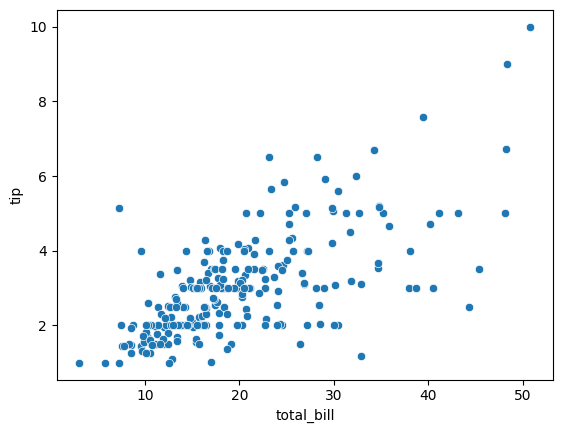

In [17]:
#total bill vs. tip
sns.scatterplot(tips, x = 'total_bill', y = 'tip')

#### Our goal is to fit a model here.

$$\text{tip} = \text{total bill}*\beta$$

#### Our workflow:
1. Instantiate model.
2. Select a learning rate $\alpha$.
3. Select a starting point $\hat{\beta}_{0}$.
4. Calculate the gradient of the loss function.
5. Calculate $\hat{\beta}_{i+1} = \hat{\beta}_i - \alpha * \frac{d L}{d \beta}$.
6. Check value of $\left|\hat{\beta}_{i+1} - \hat{\beta}_{i}\right|$.
7. Repeat steps 4 through 6 until "stopping condition" is met.

#### Step 1. Instantiate model.

Our model takes on the form:
$$ Y = \beta_0 X + \varepsilon$$

#### Step 2. Select a learning rate $\alpha$.

$$\alpha = 0.1$$

#### Step 3. Select a starting point.


In [18]:
beta0 = .15

#### Step 4. Calculate the gradient of the loss function with respect to parameter $\beta_1$.

The loss function, $L$, is our mean square error.

$$L = \frac{1}{n}\sum_{i = 1} ^ n (y_i - \hat{y}_i)^2 $$



In [19]:
yhat = beta0*tips['total_bill']
yhat

0      2.5485
1      1.5510
2      3.1515
3      3.5520
4      3.6885
        ...  
239    4.3545
240    4.0770
241    3.4005
242    2.6730
243    2.8170
Name: total_bill, Length: 244, dtype: float64

In [20]:
#mse
y = tips['tip']
X = tips['total_bill']
np.mean((y - yhat)**2)

1.196598183401639

$$L' = \frac{2}{n} \sum_{i = 1}^n (y_i - \beta*x_i)*-x_i$$

In [21]:
%%latex
$$dL = \frac{2}{n} \sum_{i = 1}^n (y_i - \beta*x_i)*-x_i$$

<IPython.core.display.Latex object>

In [22]:
def dL(beta):
    return -2*np.mean((y - beta*X)*X)

In [23]:
beta_next = beta0 - 0.1*dL(beta0)
beta_next

-0.4397179057377044

#### Step 5. Calculate $\hat{\beta}_{1,i+1} = \hat{\beta}_{1,i} - \alpha * \frac{\partial L}{\partial \beta_1}$.

In [24]:
beta0 = .15
betas = [beta0]
alpha = 0.001
for i in range(1000):
    beta_next = betas[-1] - alpha * dL(betas[-1])
    betas.append(beta_next)

In [25]:
betas[-1]

0.14373189527721666

#### Step 6. Check value of $\left|\hat{\beta}_{1,i+1} - \hat{\beta}_{1,i}\right|$.

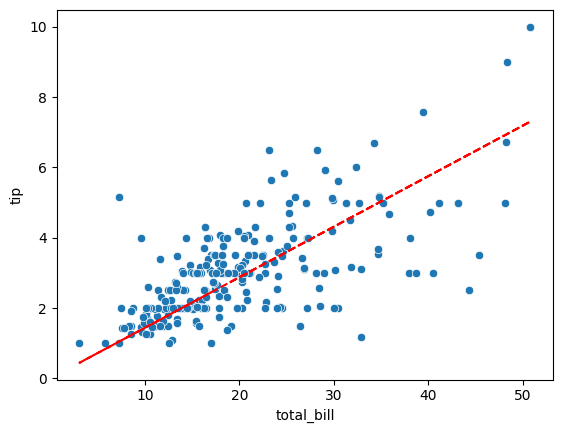

In [26]:
sns.scatterplot(tips, x='total_bill', y='tip')
plt.plot(tips['total_bill'], betas[-1]*tips['total_bill'], '--r')

#### Step 7: Save final value of $\hat{\beta}_1$.

#### Putting it all together...

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression(fit_intercept=False).fit(tips[['total_bill']], tips['tip'])
lr.coef_

array([0.1437319])

In [29]:
class GradientDescent:
    def __init__(self):
        self.beta_ = None

    def fit(self, X):
        beta0 = .15
        betas = [beta0]
        alpha = 0.001
        for i in range(1000):
            beta_next = betas[-1] - alpha * dL(betas[-1])
            betas.append(beta_next)
        self.beta_ = betas[-1]

    def predict(self, X):
        return X*self.beta_

#### Stochastic Gradient Descent

In [30]:
x = sy.Symbol('x')

In [31]:
sy.diff(f(x), x)

2*x

In [32]:
from sklearn.linear_model import SGDClassifier, SGDRegressor

In [33]:
sgd_reg = SGDRegressor(fit_intercept=False, 
                               penalty = None, 
                               max_iter=1000, 
                               alpha = 0.001).fit(tips[['total_bill']], tips['tip'])

In [34]:
sgd_reg.coef_

array([0.1840898])

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
params = {'alpha': [0.1, 0.01, 0.001, 0.00000001]}
grid = GridSearchCV(sgd_reg, param_grid=params)
grid.fit(tips[['total_bill']], tips['tip'])

GridSearchCV(estimator=SGDRegressor(alpha=0.001, fit_intercept=False,
                                    penalty=None),
             param_grid={'alpha': [0.1, 0.01, 0.001, 1e-08]})

In [37]:
grid.best_params_

{'alpha': 1e-08}

$$\beta = (X^TX)^{-1}X^TY$$

#### Problems to explore

- Incorporate an intercept term in your loss function.
- What is the loss function for logistic regression?  Does this exist in `sklearn.metrics`?
- What are the `SGDRegressor` and `SGDClassifier` objects in sklearn?